In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

WorldCities = pd.read_csv("/Users/alexandergoldstein/Downloads/citipy-0.0.5/citipy/worldcities.csv")

dataset = WorldCities.drop_duplicates()

df = dataset.sample(n=600)

#creates sample of 600 cities

df1 = pd.DataFrame(df)
df2 = pd.DataFrame(dataset)
df3 = pd.merge(df1, df2)
print(df3)

    Country       City   Latitude   Longitude
0        ro    perieti  44.550000   27.216667
1        tr      konya  37.871354   32.484636
2        af      aybak  36.264680   68.015512
3        us  wenatchee  47.423611 -120.309167
4        br     guacui -20.766667  -41.683333
..      ...        ...        ...         ...
595      fr     tarare  45.897614    4.432722
596      ph    malhiao   9.878611  123.421944
597      ph    candiis   8.970278  125.184167
598      mx   comoapan  18.416667  -95.166667
599      be    kinrooi  51.150000    5.750000

[600 rows x 4 columns]


In [2]:
r = requests.get("http://api.openweathermap.org/data/2.5/weather?q=London&appid=62bd4491af7b35bb5abe25c6463c91eb")
r2 = r.json()
print(f"London is: {r2}")
r3 = []
#r3.append[r2['main']['temp']]
print(r2['main']['temp'])
    
#find out how the API defines its data for a given city
    

London is: {'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 282.41, 'feels_like': 279.7, 'temp_min': 281.48, 'temp_max': 283.15, 'pressure': 1031, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1616246846, 'sys': {'type': 1, 'id': 1414, 'country': 'GB', 'sunrise': 1616220180, 'sunset': 1616263972}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}
282.41


In [3]:
ident=""
api_key = "85704bf6506ddcfeab7c4b0eeeed038b"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
url = f"{base_url}appid={api_key}&q="
#building the query url
#print(url)


In [7]:
temp = []
humid = []
cloud = []
wind = []
lat = []
dtime = []
country = []
long=[]

for i in df3['City']:
    a = requests.get(url+i).json()
    try:
        print(a['name'])
        temp.append(a['main']['temp'])
        humid.append(a['main']['humidity'])
        wind.append(a['wind']['speed'])
        cloud.append(a['clouds']['all'])
        lat.append(a['coord']['lat'])
        dtime.append(a['dt'])
        country.append(a['sys']['country'])
        long.append(a['coord']['lon'])
    except:
        print("n/a")
        pass
    

    

n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a
n/a


In [18]:
b = pd.DataFrame(temp)
c = pd.DataFrame(wind)
d = pd.DataFrame(cloud)
e = pd.DataFrame(humid)
f = pd.DataFrame(lat)
o = pd.DataFrame(long)
k = pd.DataFrame(dtime)
l = pd.DataFrame(country)

g = pd.concat([b, c], axis=1)
h = pd.concat([g, d], axis=1)
i = pd.concat([h, e], axis=1)
n = pd.concat([i, f], axis=1)
m = pd.concat([n, o], axis=1)
p = pd.concat([m, l], axis=1)
j = pd.concat([p, k], axis=1)

j.columns = ['temperature', 'wind_speed', 'cloudiness', 'humidity', 'latitude', 'longitude', 'country', 'datetime']


In [28]:
print(j)

j.to_csv('weatherdata.csv')

     temperature  wind_speed  cloudiness  humidity  latitude
0         275.47        3.09          75        93   44.4000
1         285.15        1.54          75        54   38.1667
2         283.95        9.77           1        28   47.4235
3         293.90        0.46          23        90  -20.7756
4         301.44        7.14         100        76    8.5061
..           ...         ...         ...       ...       ...
564       274.82        2.06          15        77   45.8976
565       302.15        4.12          20        74    9.8849
566       302.23        3.15          43        63    8.9703
567       296.07        2.60           0        74   18.4167
568       276.81        1.03          75        81   51.1476

[569 rows x 5 columns]


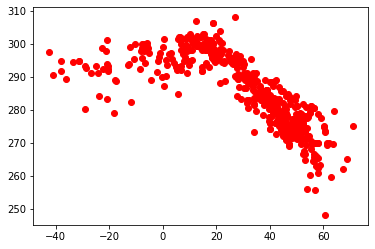

In [22]:
plt.scatter(j['latitude'], j['temperature'], c='red')
plt.show()

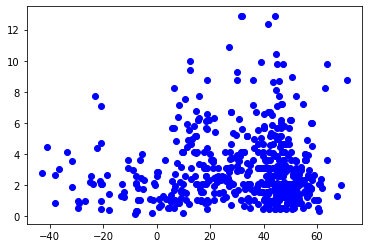

In [24]:
plt.scatter(j['latitude'], j['wind_speed'], c='blue')
plt.show()

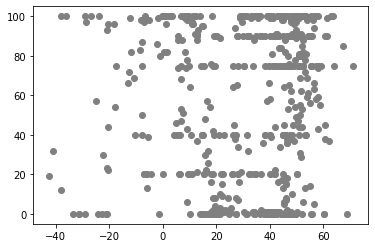

In [25]:
plt.scatter(j['latitude'], j['cloudiness'], c='gray')
plt.show()

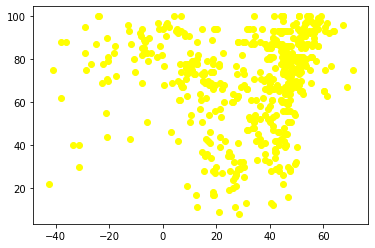

In [27]:
plt.scatter(j['latitude'], j['humidity'], c='yellow')
plt.show()

In [33]:
k = j[j['latitude'] <= 0]
l = j[j['latitude'] >= 0]

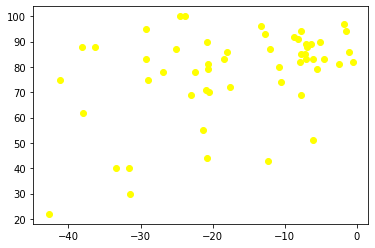

In [34]:
plt.scatter(k['latitude'], k['humidity'], c='yellow')
plt.show()

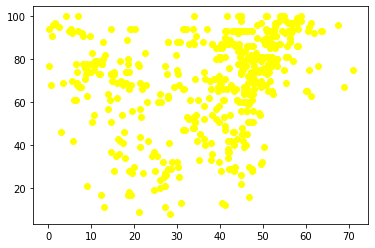

In [35]:
plt.scatter(l['latitude'], l['humidity'], c='yellow')
plt.show()

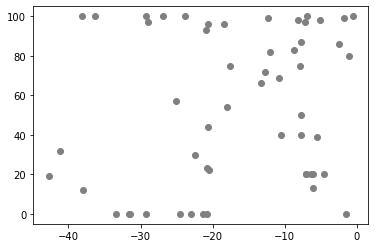

In [36]:
plt.scatter(k['latitude'], k['cloudiness'], c='gray')
plt.show()

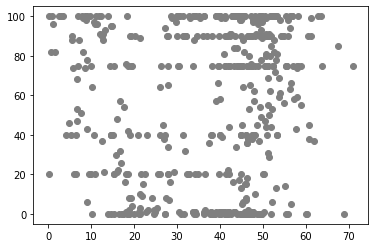

In [37]:
plt.scatter(l['latitude'], l['cloudiness'], c='gray')
plt.show()

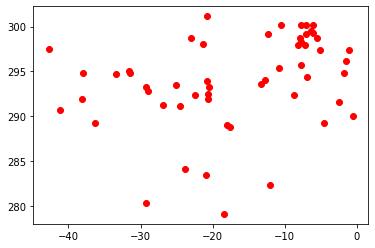

In [38]:
plt.scatter(k['latitude'], k['temperature'], c='red')
plt.show()

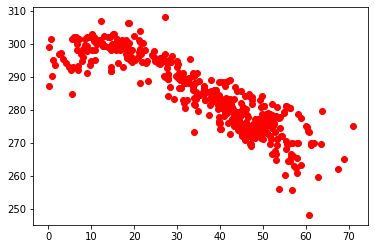

In [39]:
plt.scatter(l['latitude'], l['temperature'], c='red')
plt.show()

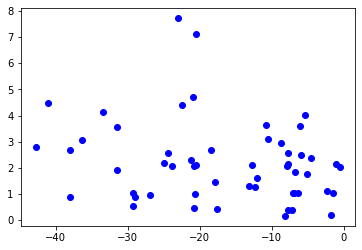

In [40]:
plt.scatter(k['latitude'], k['wind_speed'], c='blue')
plt.show()

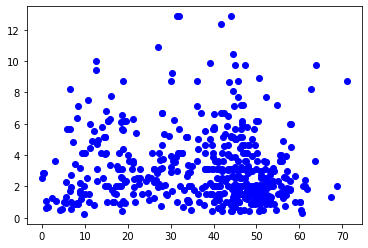

In [41]:
plt.scatter(l['latitude'], l['wind_speed'], c='blue')
plt.show()

In [ ]:
#observations

#Clear negative relationship between latitude and temperature in the Northern Hemisphere. Relationship is less clear 
#for cities in the Southern Hemisphere, though this could be due to most cities in the dataset residing in the Northern
#hemisphere as opposed to the Southern Hemisphere.

#Though less obvious, there also appears to be a negative correlation between wind speed and proximity to the equator
#for cities in the Southern Hemisphere.

#Cities nearer the equator tend to have higher humidity levels than cities North or South of it, leading to the scatter
#plot resembling an "arch".